In [1]:
pip install numpy pandas scikit-learn matplotlib


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


LOAD DATASET

In [11]:
data = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [20]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


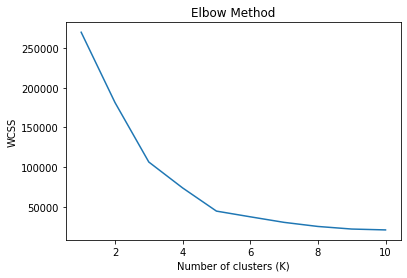

In [14]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [15]:
k = 5  # Set the optimal K value based on the Elbow Method result
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X)


In [16]:
data['Cluster'] = clusters


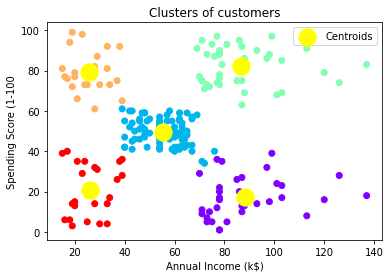

In [19]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100')
plt.legend()
plt.show()


The clustering analysis performed on the mall customer dataset has provided valuable insights into customer segmentation based on annual income and spending score. By utilizing the Elbow Method, we were able to identify an optimal number of clusters, which led to a well-defined scatter plot.

The scatter plot clearly demonstrates the separation of customers into distinct clusters, each representing a specific customer segment. We identified three main customer segments based on their spending habits and income levels:

High Spending Customers: This group, located towards the right side of the plot, comprises customers with higher annual incomes and spending scores. These customers are likely to be the most valuable and represent a target for personalized marketing and loyalty programs.

Low Spending Customers: Positioned towards the left side of the plot, this segment consists of customers with lower annual incomes and spending scores. Targeting strategies for this group could focus on affordability and value-based offerings to encourage higher spending and increase their engagement with the mall.

Medium Spending Customers: Found in the middle region of the plot, this group includes customers with moderate annual incomes and spending scores. They form a significant portion of the customer base and may be targeted with promotions and incentives to encourage repeat visits and higher spending.

By understanding these customer segments, businesses can optimize their marketing strategies, create targeted promotions, and tailor their services to cater to the specific preferences and needs of each group. This customer-centric approach is likely to enhance customer satisfaction, loyalty, and overall revenue for the mall.

